Found 234 normal images in the specified directory.
The dimensions of the first image are: (1442, 770)


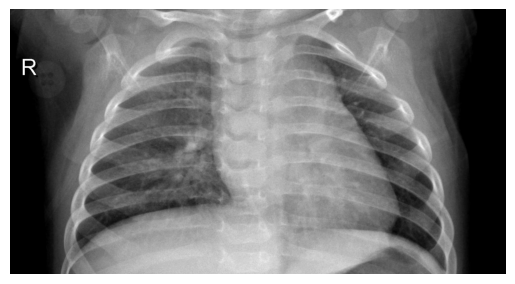

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

# If we want to import the pictures from google drive into colab, we can also do that...

# Set the path to your image directory
normal_images_dir = '../../data/test/NORMAL'  # Adjust this to match your folder structure

# List all files in the folder
normal_images = [f for f in os.listdir(normal_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of images found
print(f"Found {len(normal_images)} normal images in the specified directory.")

# Load the first image
if normal_images:
    first_image_path = os.path.join(normal_images_dir, normal_images[0])
    first_image = Image.open(first_image_path)
    print(f"The dimensions of the first image are: {first_image.size}")
    
    # Display the first image
    plt.imshow(first_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
else:
    print("No images found in the specified directory.")


Found 390 pneumonia images in the specified directory.
The dimensions of the first pneumonia image are: (856, 480)


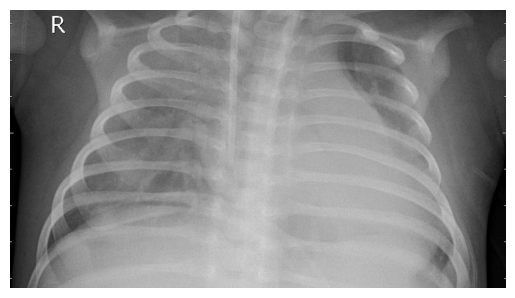

In [2]:
# Now let's import the images with pneumonia
pneumonia_images_dir = '../../data/test/PNEUMONIA'

# List all the pneumonia images
pneumonia_images = [f for f in os.listdir(pneumonia_images_dir) if f.endswith('.jpeg') or f.endswith('.jpg')]

# Print the number of pneumonia images found
print(f"Found {len(pneumonia_images)} pneumonia images in the specified directory.")

# Load the first pneumonia image
if pneumonia_images:
    first_pneumonia_image_path = os.path.join(pneumonia_images_dir, pneumonia_images[0])
    first_pneumonia_image = Image.open(first_pneumonia_image_path)
    print(f"The dimensions of the first pneumonia image are: {first_pneumonia_image.size}")
    
    # Display the first pneumonia image
    plt.imshow(first_pneumonia_image, cmap='gray')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()

We can see that both images are not of the same dimension and we can see it in the sample pictures, so these will need to be scaled once we feed them into the pretrained models

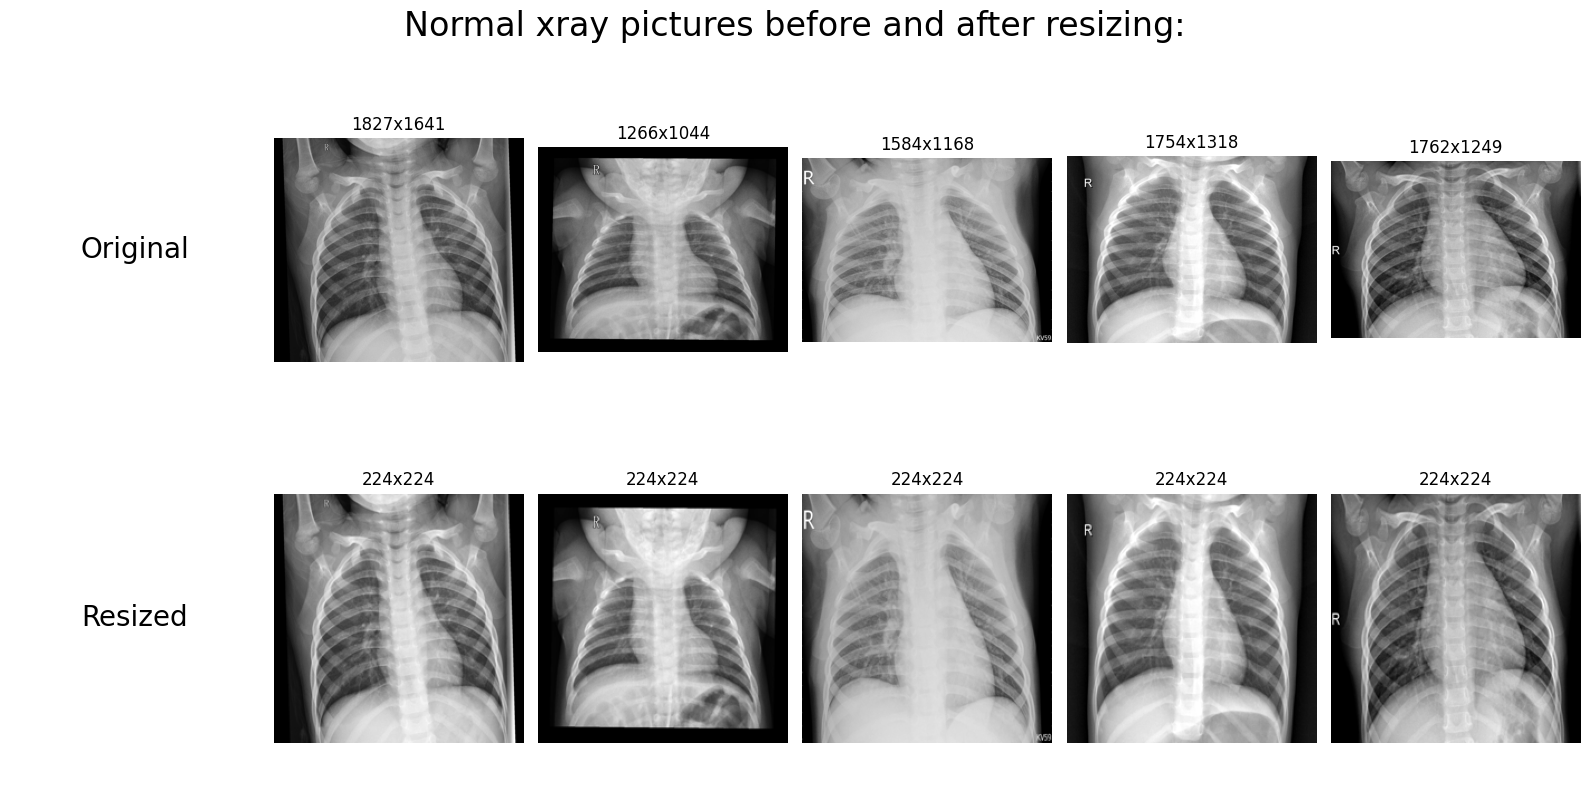

In [3]:
# Let's see how the images look like before and after resizing
sample_size = 5
image_size = (224, 224)  # Resize target

# Randomly sample images from each category
sampled_normal_images = np.random.choice(normal_images, sample_size, replace=False)
sampled_pneumonia_images = np.random.choice(pneumonia_images, sample_size, replace=False)

# Define the figure layout
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Normal xray pictures before and after resizing:", fontsize=24, y=1)

# Function to open, resize, and return an image
def load_and_resize_image(image_path, size):
    image = Image.open(image_path).convert("L")  # Convert to grayscale
    resized_image = image.resize(size)  # Resize image to target dimensions
    return image, resized_image

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_normal_images):
    original, resized = load_and_resize_image(os.path.join(normal_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

As we can observe from the resizing of the images, they look recognizable and there doesn't appear to be much of a significant loss of information following the resizing of the images.

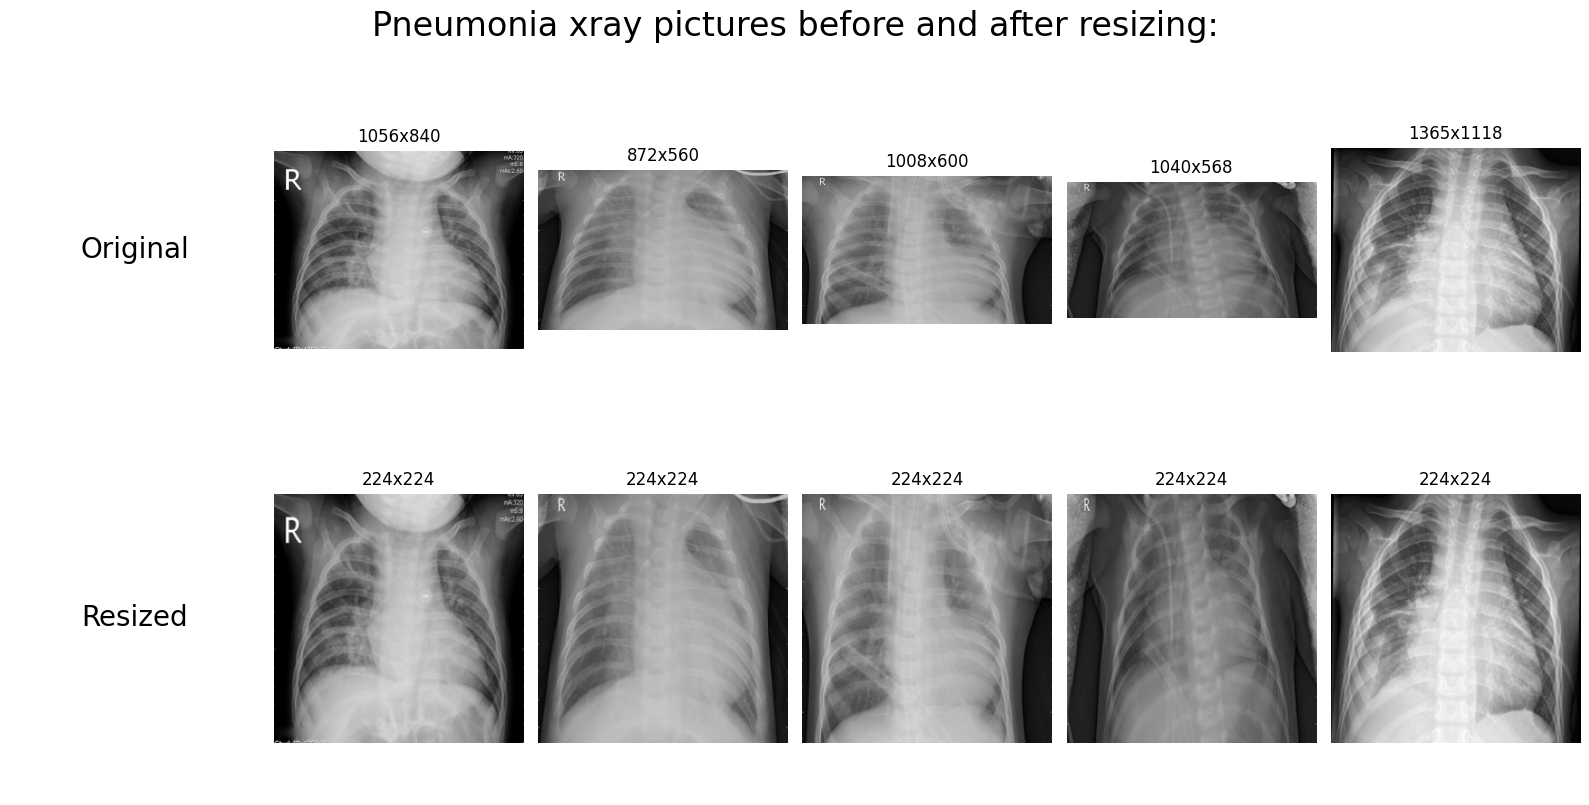

In [4]:
# Let's see how the pneumonia images look like before and after resizing
fig = plt.figure(figsize=(16, 8))
fig.suptitle("Pneumonia xray pictures before and after resizing:", fontsize=24, y=1)

# Add title for original images
ax = plt.subplot(2, sample_size + 1, 1)
ax.text(0.5, 0.5, 'Original', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the original images on top row with their dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Original image with its dimensions
    ax = plt.subplot(2, sample_size + 1, i + 2)
    plt.imshow(original, cmap='gray')
    original_dims = f"{original.size[0]}x{original.size[1]}"
    plt.title(original_dims, fontsize=12)
    plt.axis('off')

# Add title for resized images
ax = plt.subplot(2, sample_size + 1, sample_size + 2)
ax.text(0.5, 0.5, 'Resized', fontsize=20, ha='center', va='center')
plt.axis('off')

# Display the resized images on bottom row with the target dimensions
for i, image_name in enumerate(sampled_pneumonia_images):
    original, resized = load_and_resize_image(os.path.join(pneumonia_images_dir, image_name), image_size)
    
    # Resized image with new dimensions
    ax = plt.subplot(2, sample_size + 1, sample_size + i + 3)
    plt.imshow(resized, cmap='gray')
    resized_dims = f"{resized.size[0]}x{resized.size[1]}"
    plt.title(resized_dims, fontsize=12)
    plt.axis('off')

# Show plot
plt.tight_layout()
plt.show()

Pneumonia images seem to retain most of their information as well!

Load the data

In [5]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

def prepare_data(
    train_dir, test_dir, batch_size, num_cores, n_train_samples, n_test_samples, random_state
):
    """
    Prepares the datasets, computes stats, applies normalization, performs stratified subsampling,
    and creates DataLoaders for training and testing.

    Args:
        train_dir (str): Path to the training dataset directory.
        test_dir (str): Path to the testing dataset directory.
        batch_size (int): Batch size for DataLoaders.
        num_cores (int): Number of workers for DataLoaders.
        n_train_samples (int): Number of samples for training (0 for full dataset).
        n_test_samples (int): Number of samples for testing (0 for full dataset).
        random_state (int): Seed for stratified subsampling.

    Returns:
        train_loader (DataLoader): DataLoader for the training dataset.
        test_loader (DataLoader): DataLoader for the testing dataset.
    """

    # Function to compute dataset stats
    def compute_dataset_stats(dataset):
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)
        mean = torch.zeros(3)
        std = torch.zeros(3)
        total_samples = 0
        for images, _ in loader:
            batch_mean = images.mean(dim=[0, 2, 3])
            batch_std = images.std(dim=[0, 2, 3])
            mean += batch_mean * images.size(0)
            std += batch_std * images.size(0)
            total_samples += images.size(0)
        mean /= total_samples
        std /= total_samples
        return mean, std

    # Function for stratified subsampling
    def stratified_subsample(dataset, N_samples):
        targets = np.array([label for _, label in dataset.samples])
        class_counts = np.bincount(targets)
        class_proportions = class_counts / class_counts.sum()
        N_samples_per_class = (class_proportions * N_samples).astype(int)
        while N_samples_per_class.sum() != N_samples:
            N_samples_per_class[-1] = N_samples - N_samples_per_class[:-1].sum()
        sss = StratifiedShuffleSplit(n_splits=1, train_size=N_samples, random_state=random_state)
        for train_idx, _ in sss.split(np.zeros(len(targets)), targets):
            return Subset(dataset, train_idx)

    # Load initial datasets
    initial_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    train_dataset = datasets.ImageFolder(root=train_dir, transform=initial_transform)
    test_dataset = datasets.ImageFolder(root=test_dir, transform=initial_transform)

    # Compute stats for train and test datasets
    train_mean, train_std = compute_dataset_stats(train_dataset)
    test_mean, test_std = compute_dataset_stats(test_dataset)

    # Apply normalization to datasets
    train_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=train_mean.tolist(), std=train_std.tolist()),
    ])
    test_transform = transforms.Compose([
        transforms.Grayscale(num_output_channels=3),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=test_mean.tolist(), std=test_std.tolist()),
    ])
    train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transform)
    test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)

    # Perform stratified subsampling
    if n_train_samples != 0:
        train_dataset = stratified_subsample(train_dataset, n_train_samples)
    if n_test_samples != 0:
        test_dataset = stratified_subsample(test_dataset, n_test_samples)

    # Create DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_cores, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True)

    return train_loader, test_loader


In [6]:
import copy
import math
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import StratifiedKFold
from torch import amp  # Import from torch.amp instead of torch.cuda.amp
from torch.utils.data import DataLoader, Subset
from torchvision import models
from torchvision.models import ResNet18_Weights
import matplotlib.pyplot as plt
import numpy as np


In [7]:
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted == labels).sum().item()
    return correct / labels.size(0)

In [8]:
def train_and_evaluate(train_loader, val_loader, device, num_classes, learning_rate, epochs, es_patience, min_delta):
    """
    Trains and evaluates the model for the given train and validation DataLoaders.
    Incorporates learning rate scheduling, early stopping mechanisms, and mixed precision training using GradScaler.
    """
    print(f"            Training samples: {len(train_loader.dataset)}, Validation samples: {len(val_loader.dataset)}\n")
    
    # Load the pre-trained ResNet-18 model
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    # Freeze the first 15 layers
    layer_count = 0
    for child in model.children():
        for param in child.parameters():
            if layer_count < 14:
                param.requires_grad = False
            else:
                param.requires_grad = True
            layer_count += 1

    # Modify the final layer for the specified number of classes
    num_ftrs = model.fc.in_features
    model.fc = nn.Sequential(
        nn.Dropout(p=0.75),
        nn.Linear(num_ftrs, 512),
        nn.ReLU(),
        nn.Dropout(p=0.75),
        nn.Linear(512, num_classes)
    )
    model = model.to(device)
    
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    
    # Mixed Precision Training - GradScaler
    scaler = amp.GradScaler()  # Use the new amp.GradScaler()

    train_losses, val_losses = [], []
    train_accs, val_accs = [], []
    
    best_val_loss = float('inf')
    no_improvement_counter = 0  # Early stopping counter
    
    for epoch in range(epochs):
        epoch_start_time = time.time()  # Start timing the epoch
        
        # Training phase
        model.train()
        running_loss = 0.0
        running_acc = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            
            # Use autocast for mixed precision
            with amp.autocast(device_type="cuda"):  # Use the updated torch.amp.autocast
                outputs = model(images)
                loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            
            # Scaled loss backward pass
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()  # Update the scale for next iteration

            # Metrics
            running_loss += loss.item()
            running_acc += calculate_accuracy(outputs, labels)

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(running_acc / len(train_loader))

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_acc = 0.0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                
                # Use autocast for mixed precision in validation as well
                with amp.autocast(device_type="cuda"):  # Updated to use autocast with device_type="cuda"
                    outputs = model(images)
                    loss = criterion(outputs, labels)

                val_loss += loss.item()
                val_acc += calculate_accuracy(outputs, labels)

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(val_acc / len(val_loader))
        
        if epoch >= epochs/2:
            # Early stopping based on validation loss
            if val_loss < best_val_loss - min_delta:
                best_val_loss = val_loss
                no_improvement_counter = 0
            else:
                no_improvement_counter += 1

        # End timing the epoch
        epoch_end_time = time.time()
        epoch_duration = epoch_end_time - epoch_start_time
        
        print(f"            Epoch {epoch + 1}/{epochs} - Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accs[-1]:.4f}, Duration: {epoch_duration:.2f} seconds")
        
        # If no improvement for 'es_patience' epochs, stop training
        if no_improvement_counter >= es_patience:
            print(f"            Early stopping triggered after {epoch + 1} epochs")
            break

    return model, train_losses, train_accs, val_losses, val_accs


In [9]:
def save_plot(fig, directory, filename):
    """Utility function to save a matplotlib figure."""
    os.makedirs(directory, exist_ok=True)
    fig.savefig(os.path.join(directory, filename))
    plt.close(fig)

In [10]:
def cross_validation(
    train_loader, test_loader, outer_folds, inner_folds, batch_size, device, num_classes, num_cores, 
    learning_rate, epochs, random_state, es_patience, min_delta
):
    """
    Conducts nested cross-validation with the provided DataLoaders and evaluates the best model on the test_loader.
    Saves plots and returns the best final model.

    Args:
        train_loader: DataLoader for training data.
        test_loader: DataLoader for testing data.
        outer_folds (int): Number of outer folds for cross-validation.
        inner_folds (int): Number of inner folds for hyperparameter tuning.
        batch_size (int): Batch size for DataLoader.
        device: Device to train and evaluate the model (e.g., 'cuda' or 'cpu').
        num_classes (int): Number of classes in the dataset.
        num_cores (int): Number of workers for DataLoader.
        learning_rate (float): Learning rate for optimizer.
        epochs (int): Number of epochs for training.
        random_state (int): Seed for reproducibility.

    Returns:
        outer_results (list): Results for each outer fold.
        best_model: The best model trained during cross-validation.
    """

    outer_results = []
    outer_skf = StratifiedKFold(n_splits=outer_folds, shuffle=True, random_state=random_state)

    # Extract targets from the training DataLoader
    all_labels = []
    for _, labels in train_loader:
        all_labels.extend(labels.numpy())
    targets = np.array(all_labels)

    # Outer Cross-Validation Loop
    for outer_fold, (train_indices, test_indices) in enumerate(outer_skf.split(range(len(targets)), targets)):
        print(f"\n=== Outer Fold {outer_fold + 1}/{outer_folds} ===")
        print(f"    Test samples (outer fold split): {len(test_indices)}")
        
        inner_skf = StratifiedKFold(n_splits=inner_folds, shuffle=True, random_state=random_state)
        best_model, best_val_acc = None, 0

        # Initialize a dictionary to store results for this outer fold
        outer_fold_result = {
            "outer_fold": outer_fold + 1,
            "test_loss": None,
            "test_accuracy": None
        }
        
        # Inner Cross-Validation Loop
        for inner_fold, (inner_train_indices, inner_val_indices) in enumerate(inner_skf.split(
                np.array(train_indices), np.array(targets[train_indices]))):
            print(f"        --- Inner Fold {inner_fold + 1}/{inner_folds} ---\n")
            
            # Create DataLoaders for inner folds
            inner_train_loader = DataLoader(
                Subset(train_loader.dataset, np.array(train_indices)[inner_train_indices]),
                batch_size=batch_size, shuffle=True, num_workers=num_cores, pin_memory=True
            )
            inner_val_loader = DataLoader(
                Subset(train_loader.dataset, np.array(train_indices)[inner_val_indices]),
                batch_size=batch_size, shuffle=False, num_workers=num_cores, pin_memory=True
            )

            # Train and Evaluate Model
            model, train_losses, train_accs, val_losses, val_accs = train_and_evaluate(
                train_loader=inner_train_loader,
                val_loader=inner_val_loader,
                device=device,
                num_classes=num_classes,
                learning_rate=learning_rate,
                epochs=epochs,
                es_patience=es_patience,
                min_delta=min_delta
            )
            
            # Plot Training and Validation Metrics
            fig = plt.figure(figsize=(12, 6))
            
            # Loss Plot
            plt.subplot(1, 2, 1)
            # Plot data using indices starting from 0, but the x-ticks will be 1, 2, 3, ...
            plt.plot(np.arange(len(val_losses)), val_losses, color="C0", label='Validation Loss')
            plt.plot(np.arange(len(train_losses)), train_losses, color="C1", label='Train Loss')

            # Highlight best validation loss (min value)
            best_val_loss_idx = np.argmin(val_losses)
            plt.scatter(best_val_loss_idx, min(val_losses), color='C0', label=f"Best Val Loss: {min(val_losses):.4f}", marker='o')

            # Highlight best train loss (min value)
            best_train_loss_idx = np.argmin(train_losses)
            plt.scatter(best_train_loss_idx, min(train_losses), color='C1', label=f"Best Train Loss: {min(train_losses):.4f}", marker='o')

            plt.legend()
            plt.title(f"Inner Fold {inner_fold + 1} Loss")
            plt.xlabel('Epoch')
            plt.ylabel('Loss')

            # Enable grid with both horizontal and vertical lines
            plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

            # Set the X-axis to start from 1, but plot data starting from index 0
            plt.xticks(np.arange(len(val_losses)))  # Set x-ticks to be the range of the data points, starting from 0
            plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x + 1)}'))  # Adjust the ticks to start at 1


            # Accuracy Plot
            plt.subplot(1, 2, 2)
            plt.plot(np.arange(len(val_accs)), val_accs, color="C0", label='Validation Accuracy')
            plt.plot(np.arange(len(train_accs)), train_accs, color="C1", label='Train Accuracy')

            # Highlight best validation accuracy (max value)
            best_val_acc_idx = np.argmax(val_accs)
            plt.scatter(best_val_acc_idx, max(val_accs), color='C0', label=f"Best Val Accuracy: {max(val_accs):.4f}", marker='o')

            # Highlight best train accuracy (max value)
            best_train_acc_idx = np.argmax(train_accs)
            plt.scatter(best_train_acc_idx, max(train_accs), color='C1', label=f"Best Train Accuracy: {max(train_accs):.4f}", marker='o')

            plt.legend()
            plt.title(f"Inner Fold {inner_fold + 1} Accuracy")
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')

            # Enable grid with both horizontal and vertical lines
            plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, color='gray')

            # Set the X-axis to start from 1, but plot data starting from index 0
            plt.xticks(np.arange(len(val_accs)))  # Set x-ticks to be the range of the data points, starting from 0
            plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x + 1)}'))  # Adjust the ticks to start at 1

            # Save the plot
            save_plot(fig, "plots", f"outer_{outer_fold + 1}_inner_{inner_fold + 1}.png")

            # Log Inner Fold Results
            print(f"\n            Final Train Loss: {train_losses[-1]:.4f}, Train Accuracy: {train_accs[-1]:.4f}")
            print(f"            Final Validation Loss: {val_losses[-1]:.4f}, Validation Accuracy: {val_accs[-1]:.4f}\n")

            # Select Best Model Based on Validation Accuracy
            max_val_acc = max(val_accs)
            if max_val_acc > best_val_acc:
                best_val_acc = max_val_acc
                best_model = copy.deepcopy(model)
                
            print('-' * 150)
        
        # Evaluate the Best Model on the Test Dataset
        print("        Evaluating the best model on the test dataset...")
        best_model.eval()
        test_loss, test_acc = 0.0, 0.0
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = best_model(images)
                loss = torch.nn.CrossEntropyLoss()(outputs, labels)
                test_loss += loss.item()
                test_acc += calculate_accuracy(outputs, labels)
        
        test_loss /= len(test_loader)
        test_acc /= len(test_loader)
        
        # Update the outer fold result
        outer_fold_result["test_loss"] = test_loss
        outer_fold_result["test_accuracy"] = test_acc
        outer_results.append(outer_fold_result)
        
        print(f"        Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}\n")
        print('|' * 150)

    return outer_results, best_model


In [11]:
# Define paths
train_dir = '../../data/train'
test_dir = '../../data/test'

# Define parameters
batch_size = 128
num_cores = math.floor(os.cpu_count() * 0.75)
n_train_samples = 0  # Use 0 for full dataset
n_test_samples = 0    # Use 0 for full dataset
random_state = 42

In [12]:
# Call the function
train_loader, test_loader = prepare_data(
    train_dir=train_dir,
    test_dir=test_dir,
    batch_size=batch_size,
    num_cores=num_cores,
    n_train_samples=n_train_samples,
    n_test_samples=n_test_samples,
    random_state=random_state
)

# Check a batch from the DataLoader
for images, labels in train_loader:
    print(f"Batch images shape: {images.shape}")
    print(f"Batch labels shape: {labels.shape}")
    break


Batch images shape: torch.Size([128, 3, 224, 224])
Batch labels shape: torch.Size([128])


In [13]:
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Example usage
results, final_model = cross_validation(
    train_loader=train_loader, 
    test_loader=test_loader,  # Directly pass test_dataset
    outer_folds=10, 
    inner_folds=10, 
    batch_size=128, 
    device=device, 
    num_classes=2, 
    num_cores=num_cores, 
    learning_rate=0.0001, 
    epochs=15,
    random_state=42,
    es_patience=5,
    min_delta=0.00005
)


=== Outer Fold 1/10 ===
    Test samples (outer fold split): 522
        --- Inner Fold 1/10 ---

            Training samples: 4224, Validation samples: 470



/home/radugrecu97/dtu/semesters/1/deep_learning/dtu_deep_learning/.venv/lib/python3.12/site-packages/torch/nn/modules/linear.py:125: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at ../aten/src/ATen/Context.cpp:296.)
  return F.linear(input, self.weight, self.bias)


            Epoch 1/15 - Train Loss: 0.4375, Train Accuracy: 0.7867, Val Loss: 0.1144, Val Accuracy: 0.9629, Duration: 12.96 seconds
            Epoch 2/15 - Train Loss: 0.1093, Train Accuracy: 0.9631, Val Loss: 0.0694, Val Accuracy: 0.9707, Duration: 12.69 seconds
            Epoch 3/15 - Train Loss: 0.0477, Train Accuracy: 0.9853, Val Loss: 0.0336, Val Accuracy: 0.9902, Duration: 12.38 seconds
            Epoch 4/15 - Train Loss: 0.0272, Train Accuracy: 0.9920, Val Loss: 0.0282, Val Accuracy: 0.9922, Duration: 12.37 seconds
            Epoch 5/15 - Train Loss: 0.0168, Train Accuracy: 0.9957, Val Loss: 0.0241, Val Accuracy: 0.9922, Duration: 12.35 seconds
            Epoch 6/15 - Train Loss: 0.0084, Train Accuracy: 0.9986, Val Loss: 0.0239, Val Accuracy: 0.9902, Duration: 12.44 seconds
            Epoch 7/15 - Train Loss: 0.0060, Train Accuracy: 0.9988, Val Loss: 0.0218, Val Accuracy: 0.9902, Duration: 12.79 seconds
            Epoch 8/15 - Train Loss: 0.0026, Train Accuracy: 1.0000, 

In [14]:
import pandas as pd

# Set the global float format to 4 decimal points
pd.options.display.float_format = '{:.4f}'.format

# Convert results to a DataFrame for better presentation
df_results = pd.DataFrame(results)

# Print the summary table
print("\nOuter Fold Summary:")
print(df_results)

# Optionally, save the table to a CSV file
# df_results.to_csv('cross_validation_results.csv', index=False)



Outer Fold Summary:
   outer_fold  test_loss  test_accuracy
0           1     1.1849         0.8359
1           2     1.0764         0.8438
2           3     0.9492         0.8484
3           4     1.0952         0.8500
4           5     0.8279         0.8891
5           6     1.2711         0.8250
6           7     2.1294         0.7453
7           8     1.1253         0.8438
8           9     1.1916         0.8578
9          10     1.3296         0.7937


In [15]:
# Save the best model of this fold
model_save_path = os.path.join("./", "best_model.pth")
torch.save(final_model.state_dict(), model_save_path)